### **Stock Market Prediction And Forecasting Using Stacked LSTM**

In this project i am going to apply Long short-term memory (LSTM) networks are an extension of RNN that extend the memory.This algorithm is mainly useful for  time series data analysis.

# **Importing all the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

# **Save AAPL dataset into COLAB**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']))

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.557106,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.623222,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.004578,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.977623,146266000
2514,2019-12-30,72.364998,73.172501,71.305000,72.879997,71.398903,144114400


In [6]:
df.shape

(2515, 7)

In [7]:
df1=df['Close']

In [8]:
df1.shape

(2515,)

In [9]:
df1

0        7.643214
1        7.656429
2        7.534643
3        7.520714
4        7.570714
          ...    
2510    71.000000
2511    71.067497
2512    72.477501
2513    72.449997
2514    72.879997
Name: Close, Length: 2515, dtype: float64

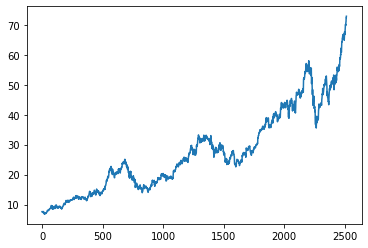

In [10]:
plt.plot(df1)

In [11]:
#Splitting the data into training and testing
data_training=pd.DataFrame(df1)[0:int(len(df1)*0.70)]
data_testing=pd.DataFrame(df1)[int(len(df1)*0.70):int(len(df1))]

In [12]:
data_training[0:5]

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [13]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [14]:
from sklearn.preprocessing  import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_arr = scaler.fit_transform(data_training)
data_training_arr

array([[0.02971782],
       [0.03021855],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089658],
       [0.84616013]])

In [16]:
def data_matrix(dataset,time_step=1):
  x_train = []
  y_train = []
  for i in range(100,len(dataset)):
    x_train.append(dataset[i-100:i])
    y_train.append(dataset[i,0])
  return np.array(x_train),np.array(y_train)
    

In [17]:
time_step=100
x_train,y_train = data_matrix(data_training_arr,time_step)
print(x_train.shape)
print(y_train.shape)

(1660, 100, 1)
(1660,)


In [18]:
#training our dataset using LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

mdl = Sequential()


mdl.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) 


mdl.add(LSTM(50, return_sequences=True))
mdl.add(LSTM(50))


mdl.add(Dense(1))

In [19]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(x_train, y_train, epochs = 100)

Epoch 1/100
52/52 [==============================] - 13s 142ms/step - loss: 0.0325
Epoch 2/100
52/52 [==============================] - 7s 141ms/step - loss: 0.0016
Epoch 3/100
52/52 [==============================] - 7s 140ms/step - loss: 0.0014
Epoch 4/100
52/52 [==============================] - 7s 140ms/step - loss: 0.0013
Epoch 5/100
52/52 [==============================] - 7s 141ms/step - loss: 0.0013
Epoch 6/100
52/52 [==============================] - 9s 169ms/step - loss: 0.0013
Epoch 7/100
52/52 [==============================] - 7s 141ms/step - loss: 0.0011
Epoch 8/100
52/52 [==============================] - 7s 144ms/step - loss: 0.0011
Epoch 9/100
52/52 [==============================] - 7s 140ms/step - loss: 0.0010
Epoch 10/100
52/52 [==============================] - 7s 142ms/step - loss: 0.0010
Epoch 11/100
52/52 [==============================] - 7s 142ms/step - loss: 0.0012
Epoch 12/100
52/52 [==============================] - 7s 143ms/step - loss: 9.2671e-04
Epoch 13

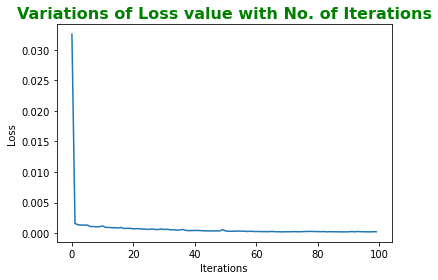

In [21]:
# Ploting Loss of our trained model

loss = mdl.history.history['loss']
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Variations of Loss value with No. of Iterations", color="green", fontsize=16, fontweight="bold");

In [22]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [23]:
final_data = data_training.tail(100)
final_data

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [24]:
final_df = final_data.append(data_testing)
final_df

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997


In [45]:
test_transform_data=scaler.fit_transform(final_df)
test_transform_data[0:5]

array([[0.02781468],
       [0.03015022],
       [0.02585065],
       [0.02547908],
       [0.02680612]])

In [46]:
x_test, y_test = data_matrix(test_transform_data,time_step)

In [47]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [48]:
y_pred=mdl.predict(x_test)

24/24 [==============================] - 1s 39ms/step


In [49]:
y_pred.shape

(755, 1)

In [50]:
scaler.scale_

array([0.02123255])

In [51]:
scale_factor=1/0.02123255
y_pred=y_pred*scale_factor
y_test = y_test*scale_factor

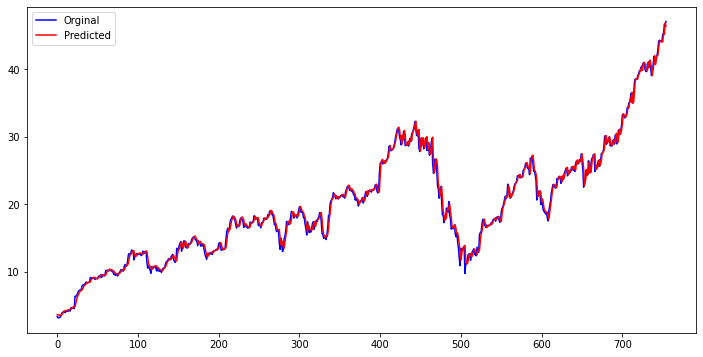

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test,"b", label="Orginal")
plt.plot(y_pred, "r" ,label = "Predicted")
plt.legend()
plt.show()

This graph is the prediction of my model